In [51]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [71]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/augmented_data',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 6000 files belonging to 2 classes.
['Tomato___Bacterial_spot', 'Tomato___Yellow_Leaf_Curl_Virus']


In [72]:
data_directory = '../Dataset/augmented_data'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [73]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
hist = model.fit(train_generator, epochs=15, validation_data=validation_generator, steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 54s 1s/step - loss: 1.2462 - accuracy: 0.7894 - val_loss: 0.2051 - val_accuracy: 0.9217
Epoch 2/15
50/50 [==============================] - 48s 953ms/step - loss: 0.2064 - accuracy: 0.9237 - val_loss: 0.1366 - val_accuracy: 0.9508
Epoch 3/15
50/50 [==============================] - 47s 942ms/step - loss: 0.2005 - accuracy: 0.9306 - val_loss: 0.1346 - val_accuracy: 0.9508
Epoch 4/15
50/50 [==============================] - 47s 938ms/step - loss: 0.1426 - accuracy: 0.9525 - val_loss: 0.1188 - val_accuracy: 0.9508
Epoch 5/15
50/50 [==============================] - 46s 930ms/step - loss: 0.1081 - accuracy: 0.9638 - val_loss: 0.1188 - val_accuracy: 0.9558
Epoch 6/15
50/50 [==============================] - 47s 937ms/step - loss: 0.1419 - accuracy: 0.9469 - val_loss: 0.1715 - val_accuracy: 0.9275
Epoch 7/15
50/50 [==============================] - 47s 939ms/step - loss: 0.1270 - accuracy: 0.9506 - val_loss: 0.0970 - val_accuracy: 0.9625
Ep

In [75]:
model.save('v1.keras')
#model = load_model('classifier.keras')

In [76]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Validation accuracy:', test_acc)

38/38 [==============================] - 6s 157ms/step - loss: 0.0829 - accuracy: 0.9675
Validation accuracy: 0.9674999713897705


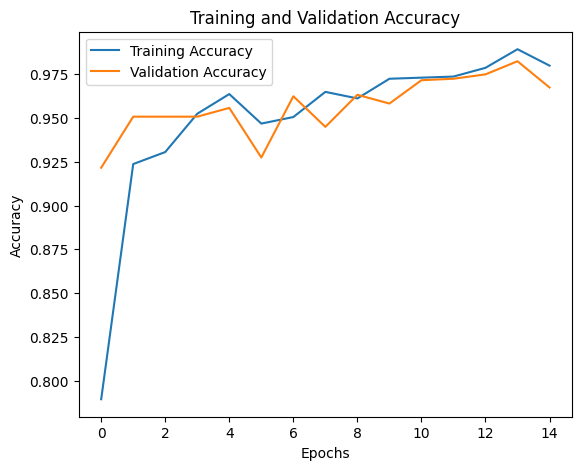

In [77]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy ')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

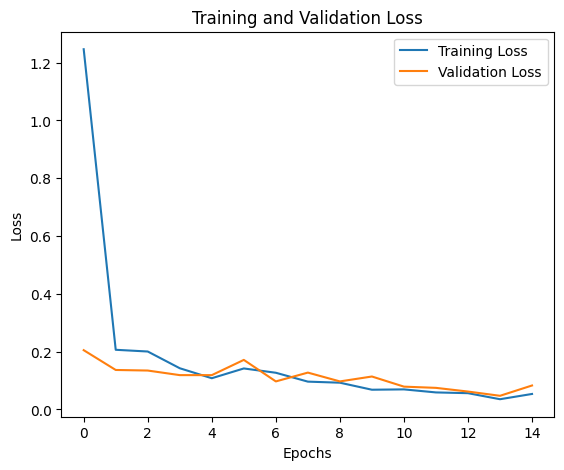

In [78]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss ')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()